In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [2]:
# 读取文件
data = pd.read_csv('./lagou_pc.csv', sep="\t", encoding="utf-8", header=None, 
                   names = ['id', 'keyword', 'detail_url', 'position', 'tags', 'salary', 'job_type', 'city', 'district', 'street','education', 'work_experience', 'release_date', 'desciption', 'company_name','company_scale', 'company_field', 'company_type', 'company_benefits'],
                   dtype = {'id':np.int8, 'salary': np.str_}
#                    dtype = {'id': np.int8, 'keyword': str, 'detail_url': str, 'position': str, 'tags': str , 'salary': str, 'job_type': str, 'city': str, 'district': str, 'street': str,'education': str, 'work_experience': str, 'release_date': str, 'desciption': str, 'company_name': str,'company_scale': str, 'company_field': str, 'company_type': str, 'company_benefits': str}
                   
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 19 columns):
id                  1113 non-null int8
keyword             1113 non-null object
detail_url          1113 non-null object
position            1113 non-null object
tags                1105 non-null object
salary              1113 non-null object
job_type            1113 non-null object
city                1113 non-null object
district            1113 non-null object
street              1113 non-null object
education           1113 non-null object
work_experience     1113 non-null object
release_date        1113 non-null object
desciption          1113 non-null object
company_name        1113 non-null object
company_scale       1113 non-null object
company_field       1113 non-null object
company_type        1113 non-null object
company_benefits    1113 non-null object
dtypes: int8(1), object(18)
memory usage: 157.7+ KB


In [3]:
# # 查看关键字为空的数据行
# data[data['keyword'].isnull()]
# # 删除
# data = data.dropna(subset = ['keyword'])
# data[data['keyword'].isnull()]

In [4]:
data.head()

,id,keyword,detail_url,position,tags,salary,job_type,city,district,street,education,work_experience,release_date,desciption,company_name,company_scale,company_field,company_type,company_benefits
0,1,数据挖掘,https://www.lagou.com/jobs/6236382.html?show=1...,机器学习,分类信息|广告营销|算法,25k-50k,全职,北京,朝阳区,酒仙桥路6号院（电子城•国际电子总部）,本科及以上,3-5年,2020-03-17,工作职责：1、大规模数据挖据分析，从海量数据中精准定位用户需求，改进搜索相关性；2、负责深度...,360,2000人以上,信息安全,上市公司,技术积淀有成长，待遇丰厚有保障
1,2,数据挖掘,https://www.lagou.com/jobs/6653241.html?show=1...,数据挖掘,NaN,20k-40k,全职,北京,海淀区,快手总部,本科及以上,3-5年,2020-03-17,职位描述1、整合海量多维数据，进行全站数据挖掘，构建用户画像体系、时空知识体系，并搭建全站核...,快手,2000人以上,文娱丨内容,D轮及以上,算法
2,3,数据挖掘,https://www.lagou.com/jobs/5918622.html?show=1...,数据挖掘,数据挖掘,8k-12k,全职,杭州,拱墅区,天行国际4栋8楼,硕士及以上,1-3年,2020-03-17,职位描述1.与业务部门和技术部门对接，完成设计，编写，维护和完善公司业务相关的算法。2.负责...,九尾多保,50-150人,移动互联网,天使轮,五险一金 发展前景 工作氛围好
3,4,数据挖掘,https://www.lagou.com/jobs/6603846.html?show=1...,算法工程师,算法|搜索|推荐|NLP,30k-50k,全职,北京,海淀区,快手总部,本科及以上,3-5年,2020-03-17,岗位职责：1、广告投放算法、策略、机制的研究和开发工作；2、广告主端分析、优化、投放控制、流...,快手,2000人以上,文娱丨内容,D轮及以上,期权激励、大牛云集
4,5,数据挖掘,https://www.lagou.com/jobs/5858053.html?show=1...,算法工程师,算法|数据挖掘|NLP|搜索,20k-40k,全职,北京,海淀区,知春路63号中国卫星通信大厦B座23层,硕士及以上,不限,2020-03-17,友情提示：如果想更了解我（天眼查）是谁，投递简历之前请先下载【天眼查】app或者浏览网页端进...,天眼查,150-500人,数据服务,不需要融资,公司业务好，技术氛围好


In [5]:
# 去除url的?后缀
data['detail_url'] = data['detail_url'].apply(lambda url: str(url).split(sep='?',maxsplit=1)[0])

## Python相关岗位的工资图表

Text(0.5, 1.0, '工资分布直方图')

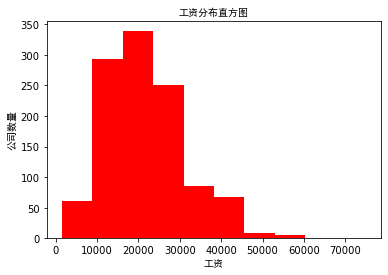

In [6]:
# 从表中可以看出，薪水一列是采用“最低-最高”的区间的方式进行表示的，这里我们将其转换成平均值，这里我们将工资中的‘k’、‘K’换成数字，便于计算。
min_ = data['salary'].str.split('-').str[0].str.rstrip('k').str.rstrip('K').astype('float64')*1000
max_ = data['salary'].str.split('-').str[1].str.rstrip('k').str.rstrip('K').astype('float64')*1000
salary = (min_ + max_) * 0.5
plt.hist(salary,10,facecolor = 'r')
plt.xlabel('工资',fontproperties = 'SimHei')
plt.ylabel('公司数量',fontproperties = 'SimHei')
plt.title('工资分布直方图',fontproperties = 'SimHei')

可以看出，Python相关岗位的工资在**10k-30k**的数量最多。

In [7]:
for index, (keyword, groupby_keyword) in enumerate(data.groupby('keyword')):
    print(index, keyword)
#     print(groupby_keyword)

0 python开发工程师
1 数据挖掘
2 爬虫


### Python开发工程师岗位薪资分析

统计岗位数: 450


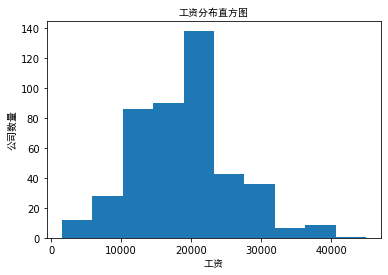

In [8]:
# 获取分组的数据
# datamining = data.groupby('keyword').groups['python开发工程师'].loc[datamining]
_ = data.groupby('keyword').get_group('python开发工程师')
min_ = _['salary'].str.split('-').str[0].str.rstrip('k').str.rstrip('K').astype('float64') * 1000
max_ = _['salary'].str.split('-').str[1].str.rstrip('k').str.rstrip('K').astype('float64') * 1000
salary = (min_ + max_) * 0.5
plt.hist(salary,10)
plt.xlabel('工资',fontproperties = 'SimHei')
plt.ylabel('公司数量',fontproperties = 'SimHei')
plt.title('工资分布直方图',fontproperties = 'SimHei')
print('统计岗位数:', len(_))
plt.show()

可以看出，Python开发工程师的薪资在**10k-25k**的数量最多。

### 数据挖掘岗位薪资分析

统计岗位数: 450


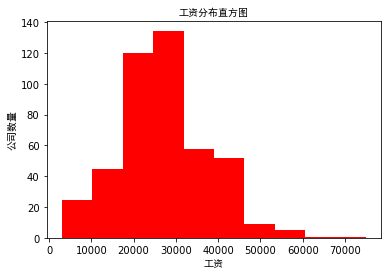

In [9]:
_ = data.groupby('keyword').get_group('数据挖掘')
min_ = _['salary'].str.split('-').str[0].str.rstrip('k').str.rstrip('K').astype('float64') * 1000
max_ = _['salary'].str.split('-').str[1].str.rstrip('k').str.rstrip('K').astype('float64') * 1000
salary = (min_ + max_) * 0.5
plt.hist(salary,10,facecolor = 'r')
plt.xlabel('工资',fontproperties = 'SimHei')
plt.ylabel('公司数量',fontproperties = 'SimHei')
plt.title('工资分布直方图',fontproperties = 'SimHei')
print('统计岗位数:', len(_))
plt.show()

可以看出，数据挖掘的薪资在**20k-30k**的数量最多，**极少数高达60k-70k!**

### 爬虫岗位薪资分析

统计岗位数: 213


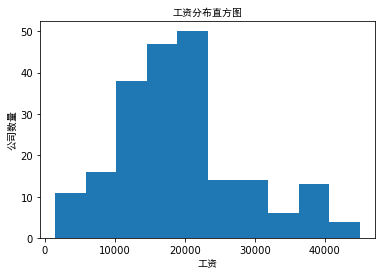

In [10]:
_ = data.groupby('keyword').get_group('爬虫')
min_ = _['salary'].str.split('-').str[0].str.rstrip('k').str.rstrip('K').astype('float64') * 1000
max_ = _['salary'].str.split('-').str[1].str.rstrip('k').str.rstrip('K').astype('float64') * 1000
salary = (min_ + max_) * 0.5
plt.hist(salary,10)
plt.xlabel('工资',fontproperties = 'SimHei')
plt.ylabel('公司数量',fontproperties = 'SimHei')
plt.title('工资分布直方图',fontproperties = 'SimHei')
print('统计岗位数:', len(_))
plt.show()

可以看出，爬虫岗位的薪资分布多数在**10k-30k**

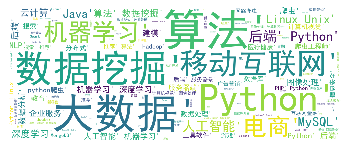

In [11]:
tags = data['tags']
text = []
for tag in tags:
    words = str(tag).split(sep='|')
    text.extend(words)
# string = str(text).replace('Python','').replace('数据挖掘','').replace('大数据','')
string = str(text)
font = r'C:\Windows\Fonts\SimHei.TTF'
wc = wordcloud.WordCloud(font_path=font, 
               background_color='white',
               width=1000,
               height=400,
               )
wc.generate(string)
wc.to_file('word.png') #保存图片
# plt.figure(figsize=(1000,400))
plt.imshow(wc)  #用plt显示图片
plt.axis('off') #不显示坐标轴
plt.show()

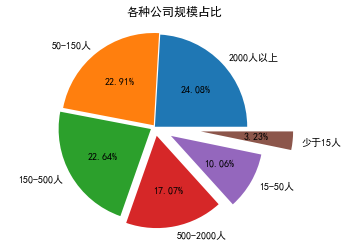

In [12]:
_ = data['company_scale'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = [0,0.02,0.05,0.1,0.2,0.5], autopct = '%1.2f%%',startangle = 0)
plt.title('各种公司规模占比')
plt.axis('equal')
plt.show()

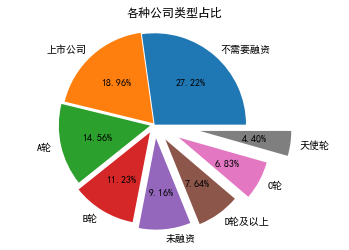

In [13]:
_ = data['company_type'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = [0,0.02,0.05,0.1,0.15,0.2,0.3,0.5], autopct = '%1.2f%%',startangle = 0)
plt.title('各种公司类型占比')
plt.axis('equal')
plt.show()

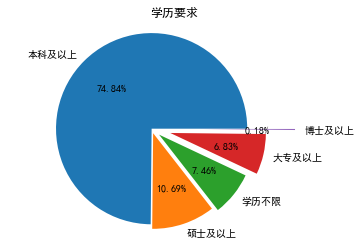

In [14]:
_ = data['education'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = [0,0.05,0.1,0.2,0.5], autopct = '%1.2f%%',startangle = 0)
plt.title('学历要求')
plt.axis('equal')
plt.show()

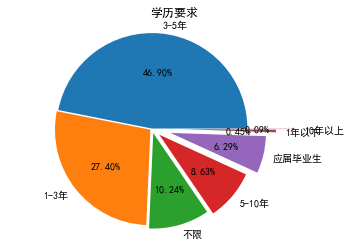

In [15]:
_ = data['work_experience'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = [0,0.02,0.05,0.1,0.2,0.3,0.5], autopct = '%1.2f%%',startangle = 0)
plt.title('学历要求')
plt.axis('equal')
plt.show()

In [16]:
data['city'].value_counts()

北京    369
上海    192
深圳    188
杭州    107
广州     84
成都     51
武汉     25
南京     17
长沙     15
苏州     12
西安      7
珠海      6
郑州      5
合肥      5
厦门      5
重庆      5
天津      3
佛山      3
东莞      3
大连      2
宁波      2
沈阳      1
南昌      1
常州      1
青岛      1
福州      1
绵阳      1
昆明      1
Name: city, dtype: int64

In [19]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.faker import Faker
city = data['city'].value_counts().index.tolist()
job_num = data['city'].value_counts().tolist()
c = (
    Geo()
    .add_schema(maptype="china")
    .add("岗位分布", [list(z) for z in zip(city, job_num)])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            is_piecewise=True,  # 设置是否为分段显示
            # 自定义的每一段的范围，以及每一段的文字，以及每一段的特别的样式。例如：
            pieces=[
                {"min": 200, "label": '>200人', "color": "#eb2f06"},
                {"min": 150, "max": 199, "label": '150-199人', "color": "#FF3030"},  # 不指定 max，表示 max 为无限大（Infinity）。
                {"min": 100, "max": 149, "label": '100-149人', "color": "#FF4500"},
                {"min": 50, "max": 99, "label": '50-99人', "color": "#FF7F50"},
                {"min": 10, "max": 49, "label": '10-49人', "color": "#FFA500"},
                {"min": 1, "max": 9, "label": '1-9人', "color": "#FFDEAD"},
            ],
            # 两端的文本，如['High', 'Low']。
            range_text=['高', '低'],
        ),
        title_opts=opts.TitleOpts(title="市级Python岗位分布图"),
    )
    .render("市级Python岗位分布图.html")
)

In [18]:
# from pyecharts.charts import Map
# from pyecharts import options as opts
# from pyecharts.globals import ThemeType

# # from snapshot_selenium import snapshot
# # from pyecharts.globals import make_snapshot

# city = data['city'].value_counts().index.tolist()
# job_num = data['city'].value_counts().tolist()
# # print(city, '\n', job_num)

# _ = list(zip(city, job_num))
# map = (
#     Map(init_opts=opts.InitOpts(bg_color="#FFFAFA", theme=ThemeType.ESSOS, width=1000))
#         .add(
#             "岗位数",
#             [list(z) for z in zip(city, job_num)],
#             "china-cities",
#             label_opts=opts.LabelOpts(is_show=False),
#         )
#         .set_global_opts(
#         title_opts=opts.TitleOpts(title="fungis-全国Python岗位数量分布图"),
#         visualmap_opts=opts.VisualMapOpts(
#             is_piecewise=True,  # 设置是否为分段显示
#             # 自定义的每一段的范围，以及每一段的文字，以及每一段的特别的样式。例如：
#             pieces=[
#                 {"min": 100, "label": '>2000人', "color": "#eb2f06"},
#                 {"min": 80, "max": 100, "label": '1001-2000人', "color": "#FF3030"},  # 不指定 max，表示 max 为无限大（Infinity）。
#                 {"min": 5, "max": 20, "label": '500-1000人', "color": "#FF4500"},
#                 {"min": 50, "max": 99, "label": '100-499人', "color": "#FF7F50"},
#                 {"min": 10, "max": 49, "label": '10-99人', "color": "#FFA500"},
#                 {"min": 1, "max": 9, "label": '1-9人', "color": "#FFDEAD"},
#             ],
#             # 两端的文本，如['High', 'Low']。
#             range_text=['高', '低'],
#         ),
#     )
# )
# # map.render_notebook()
# map.render(path="./岗位分布图1.html") # 保存png\pdf\html

'E:\\Documents\\PythonCode\\Jupyter\\拉勾网数据采集与分析\\岗位分布图1.html'

In [ ]:
# # -*- coding: utf-8 -*-

# # V1 版本开始支持链式调用
# from pyecharts import options as opts
# from pyecharts.charts import Map
# from pyecharts.globals import ThemeType  # 主题

# # 省会及直辖市
# data_ = [['江苏', 492], ['安徽', 830], ['湖南', 879], ['河南', 1073], ['浙江', 1092], ['广东', 1151], ['天津', 94], ['内蒙古', 58],
#         ['北京', 337], ['陕西', 213], ['广西', 210], ['宁夏', 49], ['贵州', 109], ['上海', 295], ['江西', 771], ['福建', 261],
#         ['新疆', 49], ['四川', 405], ['云南', 141], ['海南', 136], ['山东', 459], ['吉林', 80], ['黑龙江', 331], ['河北', 218],
#         ['香港', 36], ['重庆', 468], ['山西', 119], ['甘肃', 83], ['湖北', 29631], ['辽宁', 107], ['台湾', 18], ['澳门', 10],
#         ['青海', 18], ['西藏', 1]]

# # 方法一 设置地图参数
# map = (
#     Map(init_opts=opts.InitOpts(bg_color="#FFFAFA", theme=ThemeType.ESSOS, width=1000))
#         .add("确诊人数", data_)
#         .set_global_opts(
#         title_opts=opts.TitleOpts(title="fungis-基于丁香园数据的疫情图"),
#         visualmap_opts=opts.VisualMapOpts(
#             is_piecewise=True,  # 设置是否为分段显示
#             # 自定义的每一段的范围，以及每一段的文字，以及每一段的特别的样式。例如：
#             pieces=[
#                 {"min": 2000, "label": '>2000人', "color": "#eb2f06"},
#                 {"min": 1000, "max": 2000, "label": '1001-2000人', "color": "#FF3030"},  # 不指定 max，表示 max 为无限大（Infinity）。
#                 {"min": 500, "max": 1000, "label": '500-1000人', "color": "#FF4500"},
#                 {"min": 100, "max": 499, "label": '100-499人', "color": "#FF7F50"},
#                 {"min": 10, "max": 99, "label": '10-99人', "color": "#FFA500"},
#                 {"min": 1, "max": 9, "label": '1-9人', "color": "#FFDEAD"},
#             ],
#             # 两端的文本，如['High', 'Low']。
# #             range_text=['高', '低'],
#         ),
#     )
# )
# map.render(path="./中国疫情人数分级设色地图1.html")
# # map.render_notebook()